### REFERÊNCIA CÓDIGO BASE

https://www.youtube.com/watch?v=WOUMZatSiLM

<hr>

### IMPORTAÇÕES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import sympy as symbols
from pandas.api.types import is_numeric_dtype

> <hr>

### DATASET

> Permanece o mesmo por enquanto;

In [4]:
# substituindo 'caminho/do/seu/iris.data' pelo caminho real do seu arquivo Iris.data e 'iris.csv' pelo nome desejado para o arquivo CSV de saída.
input_file = 'C:\\JupyterLab\\PAPL-UFPE\\ML-Fuzzy\\Testes\\iris.data'
output_file = 'iris.csv'

# carregando arquivo no pandas
iris_data = pd.read_csv(input_file, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# salvando em comma separated values (csv)
iris_data.to_csv(output_file, index=False)

In [5]:
# normalização
for index in iris_data.columns: # em suma, para as colunas do DataFrame, vamos analisar se os dados são numéricos
    # se os dados forem numéricos, eles serão normalizados
    if is_numeric_dtype(iris_data[index][0]): # retomando uma função do pandas
        iris_data[index] = iris_data[index]/max(iris_data[index])

In [6]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.645570,0.795455,0.202899,0.08,Iris-setosa
1,0.620253,0.681818,0.202899,0.08,Iris-setosa
2,0.594937,0.727273,0.188406,0.08,Iris-setosa
3,0.582278,0.704545,0.217391,0.08,Iris-setosa
4,0.632911,0.818182,0.202899,0.08,Iris-setosa


**ANALISANDO A DISTRIBUIÇÃO DOS DADOS**

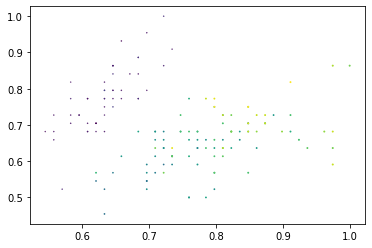

In [7]:
# todos os dados
data=iris_data.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
plt.scatter(data.sepal_length, data.sepal_width, data.petal_length, data.petal_width)

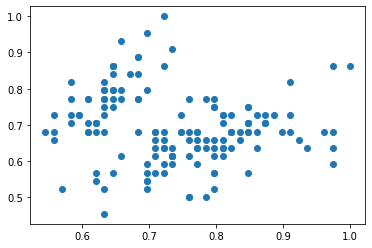

In [8]:
# data only according to sepal
data=iris_data.loc[:,['sepal_length', 'sepal_width']]
plt.scatter(data.sepal_length, data.sepal_width)

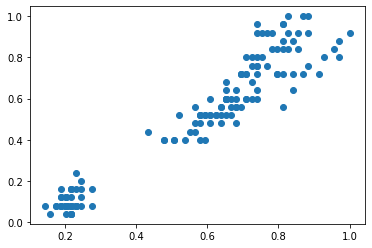

In [9]:
# data accoording only to petal
data=iris_data.loc[:,['petal_length', 'petal_width']]
plt.scatter(data.petal_length, data.petal_width)

> <hr>

### Observações Implementação

In [10]:
# aqui vai entrar só o kernel por enquanto
# deixar largura como constante NESSE doc

### FUZZY C-MEANS

In [11]:
iris_data = np.array(iris_data)
iris_data # shoukd be a 2d array

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08,
        'Iris-setosa'],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08, 'Iris-setosa'],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16, 'Iris-setosa'],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12, 'Iris-setosa'],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04,
        'Iris-setosa'],
       [0.68

In [12]:
iris_data_without_last_column = iris_data[:, :-1]
iris_data_without_last_column

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04],
       [0.6835443037974683, 0.8409090909090908, 0.21739130434782608,
        0.08],
       [0.6075949367088607, 0.7727272727272726, 0.2318840579710145, 0.08],
       [0.607594936

**CONDIÇÕES INICIAIS**

> Acho que aqui vai caber definir algumas coisas como funções e não mais como valores fixos

In [13]:
# number of clusters
    # definido como 3 pq conheço o iris dataset
K = 3

# fuzziness value 
m = [1.1, 1.6, 2]
# os valores definidos acima foram indicados pelo professor

# largura
sigma = 1

In [14]:
# vamo juntar tudo aqui de maneira que una o feito às coisas novas

In [18]:
# definir um início randomico p U
U = np.random.rand(iris_data_without_last_column.shape[0], K)

In [22]:
# precisamos de 3 centroides pro caso do iris
def calculando_centroides(iris_data_without_last_column, K, U, m):
    centroides = np.zeros((K, iris_data_without_last_column.shape[1]))
    for i in range(K):
        U_corrigido = np.tile(U[:, i][:, np.newaxis], (1, iris_data_without_last_column.shape[1]))
        m_expandido = np.tile(m[i], (iris_data_without_last_column.shape[0], iris_data_without_last_column.shape[1]))
        centroides[i, :] = np.sum((U_corrigido ** m_expandido) * iris_data_without_last_column, axis=0) / np.sum(U_corrigido ** m_expandido)
    return centroides

centroides = calculando_centroides(iris_data_without_last_column, K, U, m)

In [27]:
def gaussian_kernel(iris_data_without_last_column, centroides, sigma):
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]
    distances = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            distances[i, j] = np.linalg.norm(iris_data_without_last_column[i] - centroides[j])

    return np.exp(-distances**2 / (2 * sigma**2))

def kg_membership(iris_data_without_last_column, centroides, sigma):
    """
    Calcula a matriz de membership fuzzy entre os dados e os centroides usando o kernel gaussiano.

    Args:
    iris_data_without_last_column (ndarray): Conjunto de dados.
    centroides (ndarray): Matriz de centroides dos clusters.
    sigma (float): parâmetro de largura!!!!! muito importante futuramente (sim preciso escrever isso em todo lugar para quando a ansiedade bater)
   
   Returns:
    ndarray: matriz de MEMBERSHIP fuzzy
        # lembrando que o pertencimento com kernel é calculado com base nas distâncias
        # então aqui meio que substitui a matriz_dg do FCM
    """
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]
    U_novo = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            x = iris_data_without_last_column[i:i+1]  # Seleciona um ponto de dados como um vetor unidimensional
            c = centroides[j:j+1]  # Seleciona um centróide como um vetor unidimensional
            U_novo[i, j] = gaussian_kernel(x, c, sigma)

    return U_novo # novos valores de pertinência agora foram calculados com KERNEL


U_novo =  kg_membership(iris_data_without_last_column, centroides, sigma)

def matriz_dg(iris_data_without_last_column, centroides):
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]

    distancias = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            distancias[i, j] = np.linalg.norm(iris_data_without_last_column[i] - centroides[j])

    return distancias

matriz_dg = matriz_dg(iris_data_without_last_column, centroides)

# mudando a função objetivo pra considerar o kernel
def fobj_kernel(U_novo, matriz_dg, m):
    """
    Calcula a função objetivo do KFCM

    Args:
    U_novo (ndarray): mmebership atualizado 
        # lembrando que a alteração do kernel foi importante pra calcular ele
    matriz_dg (ndarray): Matriz de distâncias ou similaridades.
    m (float): fuzziffier
                # def como constante

    Returns:
    float: valor da func objetivo
    """
    c, n = U_novo.shape # kernel tá entrando aqui no u_novo
    objetivo = 0

    for i in range(c):
        for j in range(n):
            objetivo += U_novo[i, j] ** m * matriz_dg[i, j] ** 2

    return objetivo

N = iris_data_without_last_column.shape[0] # número de dados
velho_obj = fobj_kernel(U_novo, matriz_dg, m)

In [33]:
maximo = 100

# Inicializar valores de pertinência e centroides
U = np.random.rand(iris_data_without_last_column.shape[0], K)
centroides = calculando_centroides(iris_data_without_last_column, K, U, m)

# Calcular matriz de distâncias inicial
J_anterior = matriz_dg

for iteration in range(maximo):
    # Atualizar valores de pertinência e centroides
    U_novo = kg_membership(iris_data_without_last_column, centroides, sigma)
    centroides = calculando_centroides(iris_data_without_last_column, K, U_novo, m)
    
    # Calcular nova matriz de distâncias
    nova_J = matriz_dg
    
    # Calcular função objetivo
    novo_objetivo = fobj_kernel(U_novo, nova_J, m)

    # Verificar convergência
    if (np.all(nova_J <= J_anterior) or 
        np.all(np.abs(novo_objetivo - velho_obj) < 1e-6) or
        iteration == maximo - 1):
        break

    # Atualizar valores para a próxima iteração
    velho_obj = novo_objetivo
    J_anterior = nova_J

    # Atualizar pertinências para a próxima iteração
    U = U_novo

In [34]:
print("Centroides finais:")
print(centroides)
print()
print("Pertinências dos dados aos centroides:")
print(U)

Centroides finais:
[[0.1788777  0.17372358 0.12173575 0.10231076]
 [0.17650495 0.17386115 0.11597536 0.09537208]
 [0.17481089 0.17393629 0.11188034 0.09046121]]

Pertinências dos dados aos centroides:
[[2.77736993e-02 7.42849022e-01 6.46628516e-01]
 [5.53170137e-02 2.85011538e-01 7.51420224e-01]
 [3.09982067e-01 6.22835363e-01 4.17610860e-01]
 [8.26047436e-01 6.56327269e-01 7.34719965e-01]
 [4.41470341e-04 1.26662890e-01 8.25686496e-01]
 [3.55261092e-01 9.03838654e-01 6.38939606e-01]
 [2.58754967e-01 2.35302525e-01 5.72481780e-01]
 [4.31568429e-01 8.41497599e-01 3.97916763e-02]
 [1.26920321e-01 1.14600678e-01 6.56755155e-01]
 [1.33540961e-01 6.77206145e-01 6.98402178e-01]
 [2.46104830e-01 9.77226705e-02 2.56078817e-01]
 [8.07387598e-01 1.41418627e-01 1.88099196e-01]
 [5.14336706e-01 2.10372142e-01 8.26407460e-01]
 [8.62115396e-01 2.60157080e-01 7.35498204e-01]
 [6.17140755e-02 6.76559957e-01 8.95866739e-01]
 [4.42852504e-01 4.94289352e-01 6.85694764e-01]
 [3.21646204e-01 3.44237672e-01